# Predicting and Preventing the Spread of Coronavirus


# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score






In [ ]:
confirmed = pd.read_csv("time_series_covid19_confirmed_US.csv")
confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,"American Samoa, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,"Guam, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,5,12,14,15,27,29,32,37,45,51,55,56,58,69,77,82,84,93,112,113,121,121,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,"Northern Mariana Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,6,8,8,8,8,8,11,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,"Puerto Rico, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,5,5,5,14,21,23,31,39,51,64,79,100,127,174,239,286,316,316,452,475,513,573,620,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,"Virgin Islands, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,6,6,7,17,17,17,19,22,23,30,30,30,30,37,40,42,43,43,45,45,50,51,51,51,51,51,51,51,53


In [ ]:
confirmed['Province_State'].value_counts()
confirmed[confirmed['Province_State'] == 'Texas']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
2528,84048001,US,USA,840,48001.0,Anderson,Texas,US,31.815347,-95.653548,"Anderson, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,3,3,3,3,4,6,6,6,6
2529,84048003,US,USA,840,48003.0,Andrews,Texas,US,32.304686,-102.637655,"Andrews, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,6,6,10,10,10,11,11,12,12,13,13,19,19,19
2530,84048005,US,USA,840,48005.0,Angelina,Texas,US,31.254573,-94.609015,"Angelina, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,3,3,5,5,5,8,10,10,14,14,14,15,16,16,16,16,18,17,20,23,23
2531,84048007,US,USA,840,48007.0,Aransas,Texas,US,28.105562,-96.999505,"Aransas, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,1,2,2,2,2,2,2,2,2,2,2,2,2
2532,84048009,US,USA,840,48009.0,Archer,Texas,US,33.615700,-98.687546,"Archer, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779,84048503,US,USA,840,48503.0,Young,Texas,US,33.176597,-98.687909,"Young, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4
2780,84048505,US,USA,840,48505.0,Zapata,Texas,US,27.001564,-99.169872,"Zapata, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,3,3,3,3,3,3,3,4,6,6
2781,84048507,US,USA,840,48507.0,Zavala,Texas,US,28.866172,-99.760508,"Zavala, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3192,84080048,US,USA,840,80048.0,Out of TX,Texas,US,0.000000,0.000000,"Out of TX, Texas, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
list(confirmed['Province_State'])

['American Samoa',
 'Guam',
 'Northern Mariana Islands',
 'Puerto Rico',
 'Virgin Islands',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alabama',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Alaska',
 'Ala

In [ ]:
confirmed.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4

This new dataframe `total_by_state` shows the total of confirmed cases as of 4/18/20 by state/province.

In [ ]:
confirmed['total_cases'] = confirmed['4/18/20']
total_by_state = confirmed[['Province_State','total_cases']].groupby('Province_State').agg(np.sum)
total_by_state

,total_cases
Province_State,
Alabama,4712
Alaska,314
American Samoa,0
Arizona,4724
Arkansas,1744
California,30491
Colorado,9047
Connecticut,17550
Delaware,2538


In [ ]:
counties = pd.read_csv("abridged_couties.csv")
counties.columns

Index(['countyFIPS', 'STATEFP', 'COUNTYFP', 'CountyName', 'StateName', 'State',
       'lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE', 'CensusRegionName',
       'CensusDivisionName', 'Rural-UrbanContinuumCode2013',
       'PopulationEstimate2018', 'PopTotalMale2017', 'PopTotalFemale2017',
       'FracMale2017', 'PopulationEstimate65+2017',
       'PopulationDensityperSqMile2010', 'CensusPopulation2010',
       'MedianAge2010', '#EligibleforMedicare2018',
       'MedicareEnrollment,AgedTot2017', '3-YrDiabetes2015-17',
       'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality',
       'Smokers_Percentage', 'RespMortalityRate2014', '#FTEHospitalTotal2017',
       'TotalM.D.'s,TotNon-FedandFed2017', '#HospParticipatinginNetwork2017',
       '#Hospitals', '#ICU_beds', 'dem_to_rep_ratio', 'PopMale<52010',
       'PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 'PopMale10-142010',
       'PopFmle10-142010', 'PopMale15-192010', 'PopFmle15-192010',
       'PopMale20-242010', 'P

*Updated 5/3/20: added `Smokers_Percentage` to dataframe, adjusted ages to population of each category instead of mortality, collapsed age categories:*

- Under age 15
- 15 - 24
- 25 - 34
- 35 - 54
- 55 - 74
- 75 +

Use the [covid19-severity-prediction/`list_of_columns`](https://github.com/Yu-Group/covid19-severity-prediction/blob/master/data/list_of_columns.md) dictionary for variable definitions.

*Updated 5/7/20: added `#Hospitals` and `#ICU_beds`*

In [ ]:
counties_cleaned = counties[['State', 'PopulationEstimate2018', 'DiabetesPercentage',
                             'HeartDiseaseMortality','StrokeMortality', 'RespMortalityRate2014',
                             'PopMale<52010','PopFmle<52010', 'PopMale5-92010', 'PopFmle5-92010', 
                             'PopMale10-142010','PopFmle10-142010', 'PopMale15-192010', 
                             'PopFmle15-192010','PopMale20-242010', 'PopFmle20-242010', 
                             'PopMale25-292010','PopFmle25-292010', 'PopMale30-342010', 
                             'PopFmle30-342010','PopMale35-442010', 'PopFmle35-442010', 
                             'PopMale45-542010','PopFmle45-542010', 'PopMale55-592010', 
                             'PopFmle55-592010','PopMale60-642010', 'PopFmle60-642010', 
                             'PopMale65-742010','PopFmle65-742010', 'PopMale75-842010', 
                             'PopFmle75-842010','PopMale>842010', 'PopFmle>842010',  
                             'dem_to_rep_ratio','Smokers_Percentage', '#Hospitals',
                             '#ICU_beds']]
counties_cleaned['m_le14'] = counties.loc[:,['PopMale<52010','PopMale5-92010','PopMale10-142010']].sum(axis=1)
counties_cleaned['f_le14'] = counties.loc[:,['PopFmle<52010','PopFmle5-92010','PopFmle10-142010']].sum(axis=1)
counties_cleaned['m_15_24'] = counties.loc[:,['PopMale15-192010','PopMale20-242010']].sum(axis=1)
counties_cleaned['f_15_24'] = counties.loc[:,['PopFmle15-192010','PopFmle20-242010']].sum(axis=1)
counties_cleaned['m_25_34'] = counties.loc[:,['PopMale25-292010','PopMale30-342010']].sum(axis=1)
counties_cleaned['f_25_34'] = counties.loc[:,['PopFmle25-292010','PopFmle30-342010']].sum(axis=1)
counties_cleaned['m_35_54'] = counties.loc[:,['PopMale35-442010','PopMale45-542010']].sum(axis=1)
counties_cleaned['f_35_54'] = counties.loc[:,['PopFmle35-442010','PopFmle45-542010']].sum(axis=1)
counties_cleaned['m_55_74'] = counties.loc[:,['PopMale55-592010','PopMale60-642010','PopMale65-742010']].sum(axis=1)
counties_cleaned['f_55_74'] = counties.loc[:,['PopFmle55-592010','PopFmle60-642010','PopFmle65-742010']].sum(axis=1)
counties_cleaned['m_ge75'] = counties.loc[:,['PopMale75-842010','PopMale>842010']].sum(axis=1)
counties_cleaned['f_ge75'] = counties.loc[:,['PopFmle75-842010','PopFmle>842010']].sum(axis=1)

demographics = counties_cleaned.groupby('State').agg({'PopulationEstimate2018': np.sum,
                                                         'DiabetesPercentage': np.mean,
                                                         'HeartDiseaseMortality': np.mean,
                                                         'StrokeMortality': np.mean,
                                                         'dem_to_rep_ratio': np.mean,
                                                         'Smokers_Percentage': np.mean, 
                                                         'RespMortalityRate2014': np.mean,
                                                         'm_le14': np.sum,
                                                         'f_le14': np.sum,
                                                         'm_15_24': np.sum,
                                                         'f_15_24': np.sum,
                                                         'm_25_34': np.sum,
                                                         'f_25_34': np.sum,
                                                         'm_35_54': np.sum,
                                                         'f_35_54': np.sum,
                                                         'm_55_74': np.sum,
                                                         'f_55_74': np.sum,
                                                         'm_ge75': np.sum,
                                                         'f_ge75': np.sum,
                                                         '#Hospitals': np.sum,
                                                         '#ICU_beds': np.sum})
demographics

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds
State,,,,,,,,,,,,,,,,,,,,,
Alabama,4887871.0,14.407463,243.595522,51.450746,0.805885,19.989231,77.282985,476022.0,456819.0,342671.0,336122.0,300140.0,308782.0,641613.0,671742.0,451272.0,507262.0,108470.0,178821.0,86.0,1533.0
Arizona,7171646.0,10.060000,148.826667,30.900000,0.974740,16.483911,51.968667,692803.0,665256.0,466842.0,437324.0,437831.0,418862.0,831033.0,834007.0,581846.0,642274.0,165468.0,218471.0,76.0,1559.0
Arkansas,3013825.0,13.432000,235.172000,47.681333,0.521649,20.388849,72.727067,302717.0,289408.0,204979.0,198476.0,188432.0,187460.0,383226.0,390248.0,279429.0,306164.0,72854.0,112525.0,74.0,732.0
California,39557045.0,8.505172,153.908621,37.891379,1.641729,12.091600,52.153621,3899534.0,3728568.0,2895867.0,2694022.0,2713045.0,2604832.0,5213220.0,5221861.0,3002773.0,3309056.0,793391.0,1177787.0,329.0,7338.0
Colorado,5695564.0,6.150000,130.337500,32.851562,0.870425,14.297498,61.043125,524335.0,500882.0,357495.0,330595.0,373324.0,352954.0,727499.0,714843.0,441662.0,465942.0,96347.0,143318.0,80.0,1095.0
Connecticut,3572665.0,7.587500,149.625000,27.387500,1.184978,11.873620,47.650000,340162.0,324780.0,246066.0,232666.0,210024.0,210353.0,516910.0,543125.0,331227.0,367169.0,95225.0,156390.0,30.0,674.0
Delaware,967171.0,10.166667,171.333333,40.266667,1.144913,16.050440,53.880000,86145.0,83075.0,64145.0,63305.0,55128.0,56289.0,120926.0,128715.0,85648.0,97734.0,22947.0,33877.0,6.0,186.0
District Of Columbia,702455.0,8.800000,202.100000,36.500000,22.229820,15.965592,30.210000,42372.0,41429.0,47752.0,56277.0,58784.0,65961.0,78231.0,78131.0,45668.0,55278.0,11415.0,20425.0,6.0,314.0
Florida,21299325.0,10.686567,167.789552,37.195522,0.666205,19.191116,62.719552,1677727.0,1606881.0,1258350.0,1198790.0,1150136.0,1139409.0,2549839.0,2622908.0,1908978.0,2156630.0,644325.0,887337.0,178.0,5604.0


Now we can join the two dataframes. Note: left join shows several U.S. territories and the Diamond Princess Cruise ship that we don't have demographic info on. We should probably drop these and stick to states only.

In [ ]:
demo_state = total_by_state.join(demographics, how='inner')
demo_state

,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds
Alabama,4712,4887871.0,14.407463,243.595522,51.450746,0.805885,19.989231,77.282985,476022.0,456819.0,342671.0,336122.0,300140.0,308782.0,641613.0,671742.0,451272.0,507262.0,108470.0,178821.0,86.0,1533.0
Arizona,4724,7171646.0,10.060000,148.826667,30.900000,0.974740,16.483911,51.968667,692803.0,665256.0,466842.0,437324.0,437831.0,418862.0,831033.0,834007.0,581846.0,642274.0,165468.0,218471.0,76.0,1559.0
Arkansas,1744,3013825.0,13.432000,235.172000,47.681333,0.521649,20.388849,72.727067,302717.0,289408.0,204979.0,198476.0,188432.0,187460.0,383226.0,390248.0,279429.0,306164.0,72854.0,112525.0,74.0,732.0
California,30491,39557045.0,8.505172,153.908621,37.891379,1.641729,12.091600,52.153621,3899534.0,3728568.0,2895867.0,2694022.0,2713045.0,2604832.0,5213220.0,5221861.0,3002773.0,3309056.0,793391.0,1177787.0,329.0,7338.0
Colorado,9047,5695564.0,6.150000,130.337500,32.851562,0.870425,14.297498,61.043125,524335.0,500882.0,357495.0,330595.0,373324.0,352954.0,727499.0,714843.0,441662.0,465942.0,96347.0,143318.0,80.0,1095.0
Connecticut,17550,3572665.0,7.587500,149.625000,27.387500,1.184978,11.873620,47.650000,340162.0,324780.0,246066.0,232666.0,210024.0,210353.0,516910.0,543125.0,331227.0,367169.0,95225.0,156390.0,30.0,674.0
Delaware,2538,967171.0,10.166667,171.333333,40.266667,1.144913,16.050440,53.880000,86145.0,83075.0,64145.0,63305.0,55128.0,56289.0,120926.0,128715.0,85648.0,97734.0,22947.0,33877.0,6.0,186.0
Florida,25492,21299325.0,10.686567,167.789552,37.195522,0.666205,19.191116,62.719552,1677727.0,1606881.0,1258350.0,1198790.0,1150136.0,1139409.0,2549839.0,2622908.0,1908978.0,2156630.0,644325.0,887337.0,178.0,5604.0
Georgia,17669,10519475.0,13.222013,203.408805,46.590566,0.683748,18.262633,72.120503,1057159.0,1014471.0,707411.0,682668.0,658210.0,677350.0,1362032.0,1426760.0,785392.0,890594.0,158967.0,266639.0,129.0,2508.0
Idaho,1655,1754208.0,7.902273,154.722727,35.854545,0.354836,14.148483,56.896364,184459.0,175463.0,113718.0,109850.0,107024.0,101941.0,200649.0,199497.0,143433.0,146414.0,36041.0,49093.0,42.0,314.0


In [ ]:
demo_state.shape # 22 features

(48, 22)

We can see that the top states with the highest total cases are New York, New Jersey, and Massachusetts with the lowest total cases in North Dakota, Montana, and Wyoming.


In [ ]:
highest_cases = demo_state.sort_values(by=['total_cases'], ascending = False)
top_10_cases = highest_cases.iloc[0:10, :]
top_10_cases

,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds
New York,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0
New Jersey,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0
Massachusetts,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0
Pennsylvania,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0
Michigan,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0
California,30491,39557045.0,8.505172,153.908621,37.891379,1.641729,12.091600,52.153621,3899534.0,3728568.0,2895867.0,2694022.0,2713045.0,2604832.0,5213220.0,5221861.0,3002773.0,3309056.0,793391.0,1177787.0,329.0,7338.0
Illinois,29160,12741080.0,9.417647,182.362745,39.306863,0.571109,15.835977,63.492353,1313609.0,1260821.0,921249.0,879807.0,890669.0,885288.0,1778608.0,1818161.0,1100524.0,1222218.0,287617.0,472061.0,176.0,3144.0
Florida,25492,21299325.0,10.686567,167.789552,37.195522,0.666205,19.191116,62.719552,1677727.0,1606881.0,1258350.0,1198790.0,1150136.0,1139409.0,2549839.0,2622908.0,1908978.0,2156630.0,644325.0,887337.0,178.0,5604.0
Louisiana,23580,4659978.0,13.232812,241.418750,47.168750,0.663557,21.792924,62.449688,473394.0,454064.0,335037.0,330051.0,315046.0,313387.0,599961.0,619013.0,401816.0,445740.0,94038.0,151825.0,111.0,1289.0
Texas,18704,28701845.0,10.042913,194.536220,43.811811,0.488434,14.942724,63.857283,2930829.0,2807761.0,1901039.0,1799164.0,1821853.0,1791620.0,3425800.0,3467918.0,1944229.0,2125718.0,448530.0,681100.0,384.0,6199.0


In [ ]:
highest_cases = demo_state.sort_values(by=['total_cases'], ascending = False)
highest_cases = highest_cases.reset_index().rename(columns={'index':'state'})
highest_cases

,state,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds
0,New York,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0
1,New Jersey,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0
2,Massachusetts,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0
3,Pennsylvania,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0
4,Michigan,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0
5,California,30491,39557045.0,8.505172,153.908621,37.891379,1.641729,12.091600,52.153621,3899534.0,3728568.0,2895867.0,2694022.0,2713045.0,2604832.0,5213220.0,5221861.0,3002773.0,3309056.0,793391.0,1177787.0,329.0,7338.0
6,Illinois,29160,12741080.0,9.417647,182.362745,39.306863,0.571109,15.835977,63.492353,1313609.0,1260821.0,921249.0,879807.0,890669.0,885288.0,1778608.0,1818161.0,1100524.0,1222218.0,287617.0,472061.0,176.0,3144.0
7,Florida,25492,21299325.0,10.686567,167.789552,37.195522,0.666205,19.191116,62.719552,1677727.0,1606881.0,1258350.0,1198790.0,1150136.0,1139409.0,2549839.0,2622908.0,1908978.0,2156630.0,644325.0,887337.0,178.0,5604.0
8,Louisiana,23580,4659978.0,13.232812,241.418750,47.168750,0.663557,21.792924,62.449688,473394.0,454064.0,335037.0,330051.0,315046.0,313387.0,599961.0,619013.0,401816.0,445740.0,94038.0,151825.0,111.0,1289.0
9,Texas,18704,28701845.0,10.042913,194.536220,43.811811,0.488434,14.942724,63.857283,2930829.0,2807761.0,1901039.0,1799164.0,1821853.0,1791620.0,3425800.0,3467918.0,1944229.0,2125718.0,448530.0,681100.0,384.0,6199.0


In [ ]:
top_10_cases = highest_cases.iloc[0:10, :]
top_10_cases

,state,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds
0,New York,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0
1,New Jersey,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0
2,Massachusetts,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0
3,Pennsylvania,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0
4,Michigan,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0
5,California,30491,39557045.0,8.505172,153.908621,37.891379,1.641729,12.091600,52.153621,3899534.0,3728568.0,2895867.0,2694022.0,2713045.0,2604832.0,5213220.0,5221861.0,3002773.0,3309056.0,793391.0,1177787.0,329.0,7338.0
6,Illinois,29160,12741080.0,9.417647,182.362745,39.306863,0.571109,15.835977,63.492353,1313609.0,1260821.0,921249.0,879807.0,890669.0,885288.0,1778608.0,1818161.0,1100524.0,1222218.0,287617.0,472061.0,176.0,3144.0
7,Florida,25492,21299325.0,10.686567,167.789552,37.195522,0.666205,19.191116,62.719552,1677727.0,1606881.0,1258350.0,1198790.0,1150136.0,1139409.0,2549839.0,2622908.0,1908978.0,2156630.0,644325.0,887337.0,178.0,5604.0
8,Louisiana,23580,4659978.0,13.232812,241.418750,47.168750,0.663557,21.792924,62.449688,473394.0,454064.0,335037.0,330051.0,315046.0,313387.0,599961.0,619013.0,401816.0,445740.0,94038.0,151825.0,111.0,1289.0
9,Texas,18704,28701845.0,10.042913,194.536220,43.811811,0.488434,14.942724,63.857283,2930829.0,2807761.0,1901039.0,1799164.0,1821853.0,1791620.0,3425800.0,3467918.0,1944229.0,2125718.0,448530.0,681100.0,384.0,6199.0


# Exploratory Plots

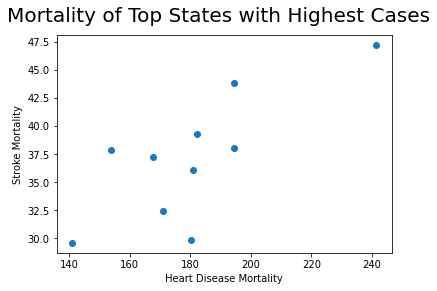

In [ ]:
x = top_10_cases['HeartDiseaseMortality']
y = top_10_cases['StrokeMortality']
fig = plt.figure()
plt.scatter(x, y)
fig.suptitle('Mortality of Top States with Highest Cases', fontsize=20)
plt.xlabel("Heart Disease Mortality")
plt.ylabel("Stroke Mortality")
plt.show()

In [ ]:
fig.savefig('conditions.jpg')

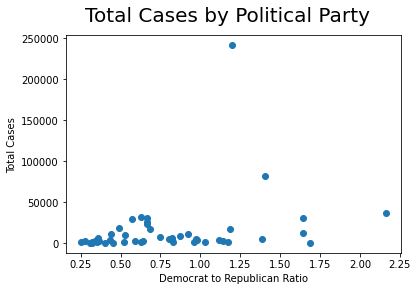

In [ ]:
y = highest_cases['total_cases']
x = highest_cases['dem_to_rep_ratio']
fig = plt.figure()
plt.scatter(x, y)
fig.suptitle('Total Cases by Political Party', fontsize=20)
plt.ylabel("Total Cases")
plt.xlabel("Democrat to Republican Ratio")
plt.show()

In [ ]:
fig.savefig('cases_political.jpg')

*Updated 5/3/20: added barplot of `Smokers_Percentage`*

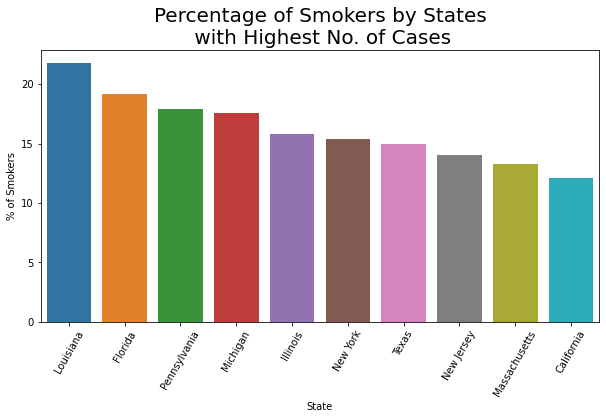

In [ ]:
result = top_10_cases.groupby('state').agg(np.mean).reset_index().sort_values('Smokers_Percentage', ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x = 'state',
            y = 'Smokers_Percentage',
            data = top_10_cases,
            order=result['state'])
plt.xticks(rotation=60)
plt.xlabel("State")
plt.ylabel("% of Smokers")
plt.title("Percentage of Smokers by States\n with Highest No. of Cases",
         fontsize=20)
plt.savefig('smoking_by_state.png');

We would expect to see a negative relationship in hospitals/ICU beds and number of cases: with a higher number of ICU beds or hospitals in a state, there will be less cases.

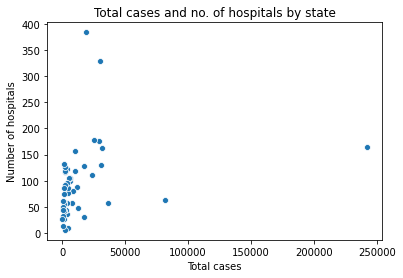

In [ ]:
sns.scatterplot(x = 'total_cases', y = '#Hospitals', data=highest_cases)
plt.xlabel('Total cases')
plt.ylabel('Number of hospitals')
plt.title('Total cases and no. of hospitals by state');

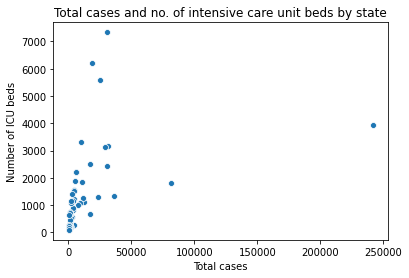

In [ ]:
sns.scatterplot(x = 'total_cases', y = '#ICU_beds', data=highest_cases)
plt.xlabel('Total cases')
plt.ylabel('Number of ICU beds')
plt.title('Total cases and no. of intensive care unit beds by state');

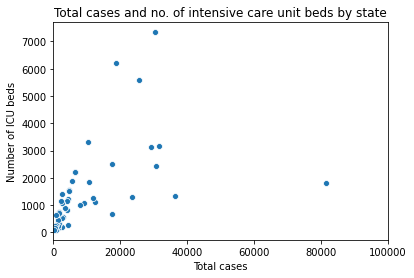

In [ ]:
sns.scatterplot(x = 'total_cases', y = '#ICU_beds', data=highest_cases)
plt.xlabel('Total cases')
plt.ylabel('Number of ICU beds')
plt.title('Total cases and no. of intensive care unit beds by state')
plt.xlim(0,100000);

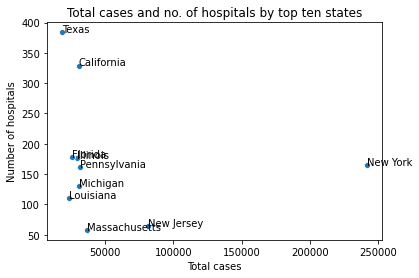

In [ ]:
plot1 = sns.scatterplot(x = 'total_cases', y = '#Hospitals', data=top_10_cases)
plt.xlabel('Total cases')
plt.ylabel('Number of hospitals')
plt.title('Total cases and no. of hospitals by top ten states');

# add annotations one by one with a loop
for line in range(0,top_10_cases.shape[0]):
     plot1.text(top_10_cases.total_cases[line]+0.2, 
             top_10_cases['#Hospitals'][line], 
             top_10_cases.state[line], 
             horizontalalignment='left', color='black')
plt.savefig('10_hospitals.png');

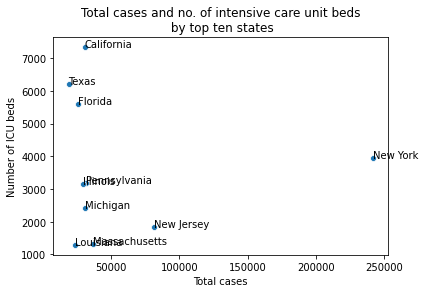

In [ ]:
plot2 = sns.scatterplot(x = 'total_cases', y = '#ICU_beds', data=top_10_cases)
plt.xlabel('Total cases')
plt.ylabel('Number of ICU beds')
plt.title('Total cases and no. of intensive care unit beds\n by top ten states');

# add annotations one by one with a loop
for line in range(0,top_10_cases.shape[0]):
     plot2.text(top_10_cases.total_cases[line]+0.2, 
             top_10_cases['#ICU_beds'][line], 
             top_10_cases.state[line], 
             horizontalalignment='left', color='black')

plt.savefig('10_icubeds.png');

This is not really the case.

# Principal Components Analysis of Existing Conditions
*Updated 05/03/20: added `RespMortality`*

In [ ]:
existing_conditions = highest_cases[['DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality', 'RespMortalityRate2014']]

In [ ]:
existing_conditions_mean = np.mean(existing_conditions, axis = 0)
existing_conditions_centered = existing_conditions - existing_conditions_mean

In [ ]:
u, s, vt = np.linalg.svd(existing_conditions_centered, full_matrices = False)

Below, we provide code that computes the variance for each column of the data.

In [ ]:
np.var(existing_conditions, axis=0)

DiabetesPercentage         4.357012
HeartDiseaseMortality    956.394449
StrokeMortality           37.882427
RespMortalityRate2014    101.512991
dtype: float64

The total variance of our dataset is given by the sum of these numbers.

In [ ]:
total_variance_computed_from_data = sum(np.var(existing_conditions, axis=0))
total_variance_computed_from_data

1100.1468781272938

In [ ]:
variance_explained_by_1st_pc = np.round(np.square(s)/sum(np.square(s)), 2)[0]
variance_explained_by_1st_pc

0.95

In [ ]:
variance_explained_by_2nd_pc = np.round(np.square(s)/sum(np.square(s)), 2)[1]
variance_explained_by_2nd_pc

0.04

In [ ]:
variance_explained_by_3rd_pc = np.round(np.square(s)/sum(np.square(s)), 2)[2]
variance_explained_by_3rd_pc

0.01

Scree plot that shows the variance explained by all of our principal components, ordered from most to least. Here the y-axis is the amount of variance explained by the ith principal component.

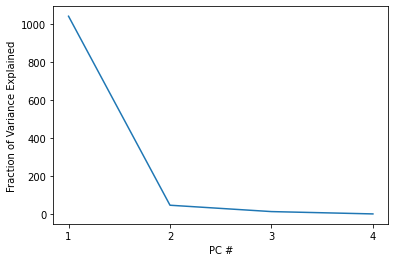

In [ ]:
plt.plot([1, 2, 3, 4], s**2 / len(existing_conditions_centered));
plt.xticks([1, 2, 3, 4], [1, 2, 3, 4]);
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');

We can see that if we use the first principal component of diabetes percentage, 95% of the variance is accounted for.

In [ ]:
conditions_pcs = existing_conditions_centered @ vt.T

In [ ]:
conditions_3pcs = conditions_pcs.iloc[:, 0:3]
conditions_3pcs = conditions_3pcs.rename(columns = {0: 'pc1', 1: 'pc2', 2: 'pc3'})
conditions_3pcs

,pc1,pc2,pc3
0,0.316583,-6.916767,7.426751
1,11.727697,-15.773632,2.080276
2,40.445144,-6.600674,1.289983
3,-0.623115,-8.679231,1.035234
4,-15.830925,-4.149578,2.105468
5,25.053188,-2.381825,-4.111107
6,-5.144304,1.366362,-0.225478
7,9.247148,4.143581,-0.468548
8,-62.866561,-13.875688,-0.925529
9,-17.621897,-0.898621,-3.023757


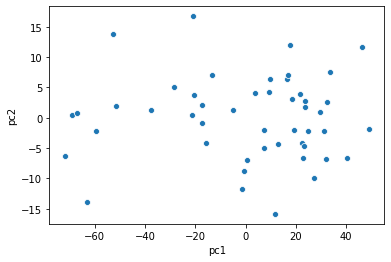

In [ ]:
first_2_pcs_jittered = conditions_3pcs + np.random.normal(0, 0.1, size = (len(conditions_3pcs), 3));
first_2_pcs_jittered 
sns.scatterplot(data = first_2_pcs_jittered, x = "pc1", y = "pc2");

## PCA on Other Features
Use the remainder of the data: ratio of Democrats to Republicans, age by sex, smoking habits, and population to see how strong they are as predictors. (*Note: unfinished*)

In [ ]:
age_by_sex = highest_cases.iloc[:,-12:]
age_by_sex_centered = age_by_sex - np.mean(age_by_sex, axis=0)
age_by_sex_centered.head()

,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds
0,953257.708333,928385.9375,886614.604167,930187.375,1.798762e+06,1.919445e+06,1.133447e+06,1.333820e+06,324099.0,551459.270833,71.104167,2431.354167
1,130481.708333,113285.9375,129793.604167,137472.375,4.042006e+05,4.427906e+05,2.068364e+05,2.537605e+05,66599.0,126177.270833,-29.895833,301.354167
2,12843.708333,30010.9375,-6754.395833,9360.375,5.036565e+04,7.871658e+04,2.417744e+04,3.864948e+04,17942.0,46539.270833,-35.895833,-194.645833
3,446058.708333,437583.9375,333902.604167,334681.375,8.810446e+05,9.045266e+05,6.694204e+05,7.354595e+05,220652.0,377334.270833,68.104167,1648.354167
4,259753.708333,253347.9375,157485.604167,164128.375,5.014756e+05,5.160296e+05,3.790434e+05,4.006605e+05,97583.0,157455.270833,36.104167,902.354167


In [ ]:
u, s, vt = np.linalg.svd(age_by_sex_centered, full_matrices = False)
np.round(s**2 / sum(s**2), 2)

array([0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

Something looks off? Otherwise, age is not a good predictor.

# Training and testing

In [ ]:
highest_cases_len = len(highest_cases)

In [ ]:
#create column of cases/population
highest_cases['cases_prop'] = highest_cases['total_cases']/highest_cases['PopulationEstimate2018'] #note that population is 2018
highest_cases['hosp_prop'] = highest_cases['#Hospitals']/highest_cases['PopulationEstimate2018'] #note that population is 2018
highest_cases['icu_prop'] = highest_cases['#ICU_beds']/highest_cases['PopulationEstimate2018'] #note that population is 2018

#create categorical column for states
highest_cases['state_cat'] = LabelEncoder().fit_transform(highest_cases['state'])
highest_cases.head()

,state,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds,cases_prop,hosp_prop,icu_prop,state_cat
0,New York,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0,0.012369,0.000008,0.000202,29
1,New Jersey,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0,0.009140,0.000007,0.000205,27
2,Massachusetts,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0,0.005270,0.000008,0.000192,18
3,Pennsylvania,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0,0.002471,0.000013,0.000247,35
4,Michigan,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0,0.003080,0.000013,0.000242,19


*Highest* States by Proportional Cases

In [ ]:
highest_cases_prop = highest_cases.sort_values(by=['cases_prop'], ascending = False)
top_10_cases_prop = highest_cases_prop.iloc[0:10, :]
top_10_cases_prop

,state,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds,cases_prop,hosp_prop,icu_prop,state_cat
0,New York,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0,0.012369,0.000008,0.000202,29
1,New Jersey,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0,0.009140,0.000007,0.000205,27
2,Massachusetts,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0,0.005270,0.000008,0.000192,18
8,Louisiana,23580,4659978.0,13.232812,241.418750,47.168750,0.663557,21.792924,62.449688,473394.0,454064.0,335037.0,330051.0,315046.0,313387.0,599961.0,619013.0,401816.0,445740.0,94038.0,151825.0,111.0,1289.0,0.005060,0.000024,0.000277,15
11,Connecticut,17550,3572665.0,7.587500,149.625000,27.387500,1.184978,11.873620,47.650000,340162.0,324780.0,246066.0,232666.0,210024.0,210353.0,516910.0,543125.0,331227.0,367169.0,95225.0,156390.0,30.0,674.0,0.004912,0.000008,0.000189,5
23,Rhode Island,4491,1057315.0,7.340000,155.040000,27.660000,1.388471,13.296968,45.710000,93120.0,88592.0,81386.0,80827.0,63182.0,63780.0,145393.0,153817.0,96681.0,107787.0,28638.0,49364.0,10.0,279.0,0.004248,0.000009,0.000264,36
4,Michigan,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0,0.003080,0.000013,0.000242,19
30,Delaware,2538,967171.0,10.166667,171.333333,40.266667,1.144913,16.050440,53.880000,86145.0,83075.0,64145.0,63305.0,55128.0,56289.0,120926.0,128715.0,85648.0,97734.0,22947.0,33877.0,6.0,186.0,0.002624,0.000006,0.000192,6
3,Pennsylvania,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0,0.002471,0.000013,0.000247,35
6,Illinois,29160,12741080.0,9.417647,182.362745,39.306863,0.571109,15.835977,63.492353,1313609.0,1260821.0,921249.0,879807.0,890669.0,885288.0,1778608.0,1818161.0,1100524.0,1222218.0,287617.0,472061.0,176.0,3144.0,0.002289,0.000014,0.000247,10


In [ ]:
# This makes the train-test split in this section reproducible across different runs 
# of the notebook. You do not need this line to run train_test_split in general
np.random.seed(25)
shuffled_indices = np.random.permutation(highest_cases_len)

# Set train_indices to the first 80% of shuffled_indices and and test_indices to the rest.
train_indices = shuffled_indices[0:40]
test_indices = shuffled_indices[40:49]

# Create train and test` by indexing into `full_data` using 
# `train_indices` and `test_indices`
train = highest_cases.iloc[train_indices]
test = highest_cases.iloc[test_indices]

highest_cases =  highest_cases.drop(columns = 'state') #drop nominal state column

# Linear Regression

In [ ]:
highest_cases

,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds,cases_prop,hosp_prop,icu_prop,state_cat
0,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0,0.012369,0.000008,0.000202,29
1,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0,0.009140,0.000007,0.000205,27
2,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0,0.005270,0.000008,0.000192,18
3,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0,0.002471,0.000013,0.000247,35
4,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0,0.003080,0.000013,0.000242,19
5,30491,39557045.0,8.505172,153.908621,37.891379,1.641729,12.091600,52.153621,3899534.0,3728568.0,2895867.0,2694022.0,2713045.0,2604832.0,5213220.0,5221861.0,3002773.0,3309056.0,793391.0,1177787.0,329.0,7338.0,0.000771,0.000008,0.000186,3
6,29160,12741080.0,9.417647,182.362745,39.306863,0.571109,15.835977,63.492353,1313609.0,1260821.0,921249.0,879807.0,890669.0,885288.0,1778608.0,1818161.0,1100524.0,1222218.0,287617.0,472061.0,176.0,3144.0,0.002289,0.000014,0.000247,10
7,25492,21299325.0,10.686567,167.789552,37.195522,0.666205,19.191116,62.719552,1677727.0,1606881.0,1258350.0,1198790.0,1150136.0,1139409.0,2549839.0,2622908.0,1908978.0,2156630.0,644325.0,887337.0,178.0,5604.0,0.001197,0.000008,0.000263,7
8,23580,4659978.0,13.232812,241.418750,47.168750,0.663557,21.792924,62.449688,473394.0,454064.0,335037.0,330051.0,315046.0,313387.0,599961.0,619013.0,401816.0,445740.0,94038.0,151825.0,111.0,1289.0,0.005060,0.000024,0.000277,15
9,18704,28701845.0,10.042913,194.536220,43.811811,0.488434,14.942724,63.857283,2930829.0,2807761.0,1901039.0,1799164.0,1821853.0,1791620.0,3425800.0,3467918.0,1944229.0,2125718.0,448530.0,681100.0,384.0,6199.0,0.000652,0.000013,0.000216,40


In [ ]:
from sklearn import linear_model as lm

linear_model = lm.LinearRegression(fit_intercept=True)

In [ ]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    # Transform Data, Select Features
    data = select_columns(data, 
                          'total_cases',
                          'PopulationEstimate2018', 
                          'DiabetesPercentage', 
                          'HeartDiseaseMortality',
                          'StrokeMortality',
                          'dem_to_rep_ratio',
                       #   'Smokers_Percentage',
                         )
    
    # Return predictors and response variables separately
    X = data.drop(['total_cases'], axis = 1)
    y = data.loc[:, 'total_cases']
    
    return X, y

In [ ]:
# Pre-process our training and test data in exactly the same way
X_train, y_train = process_data_gm(train)
X_test, y_test = process_data_gm(test)

In [ ]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)

In [ ]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    result = np.sqrt(((predicted - actual) ** 2).mean())
    return result

In [ ]:
training_error = rmse(y_train, y_fitted) #y_test are the total_cases
test_error = rmse(y_test, y_predicted) #how far away testing data set are from y_test
print('Training error: ', training_error)
print('Test error: ', test_error)

Training error:  30073.067993493863
Test error:  17379.69633807324


*Updated 5/3/20: adding `Smokers_Percentage` improved test error, but training error stayed the same. $R^2$ values below:*

In [ ]:
train_r2 = linear_model.score(X_train, y_train)
test_r2 = linear_model.score(X_test, y_test)
print('Train R^2: ', train_r2)
print('Test R^2: ', test_r2)

Train R^2:  0.4081147435524509
Test R^2:  -1.8062140861716711


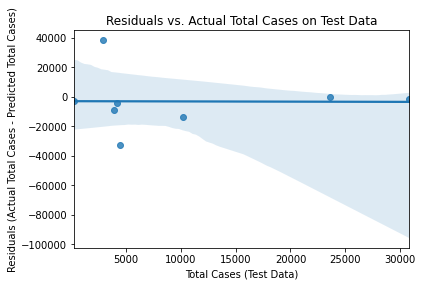

In [ ]:
residuals = y_test - y_predicted
ax = sns.regplot(y_test, residuals)
ax.set_xlabel('Total Cases (Test Data)')
ax.set_ylabel('Residuals (Actual Total Cases - Predicted Total Cases)')
ax.set_title("Residuals vs. Actual Total Cases on Test Data");

Ideally, we would see a horizontal line of points at 0 (perfect prediction!). The next best thing would be a homogenous set of points centered at 0.

Looking at $\hat{Y}$ and $Y$ more carefully...

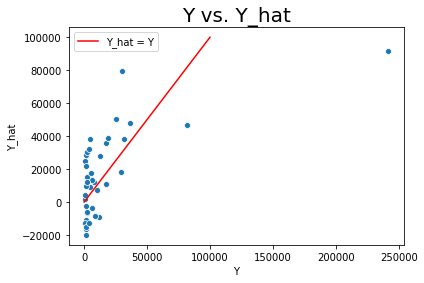

In [ ]:
sns.scatterplot(x=y_train, y=y_fitted)
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.plot(np.linspace(0,100000,100), np.linspace(0,100000,100),'r-',label='Y_hat = Y')
plt.legend()
plt.title("Y vs. Y_hat", fontsize=20);

That point on the far right is **New York** -- this plot shows that the linear model greatly underestimates the number of cases in this state. This might be why our model's RMSE is high. What are some ways to improve the model? Log or square the predictors, add more predictors in the model?

#Linear Regression with Proportional Cases

In [ ]:
#confirm that df has 'cases_prop' feature
highest_cases.head()

,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds,cases_prop,hosp_prop,icu_prop,state_cat
0,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0,0.012369,0.000008,0.000202,29
1,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0,0.009140,0.000007,0.000205,27
2,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0,0.005270,0.000008,0.000192,18
3,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0,0.002471,0.000013,0.000247,35
4,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0,0.003080,0.000013,0.000242,19


In [ ]:
X = highest_cases[['PopulationEstimate2018', 'DiabetesPercentage', 'HeartDiseaseMortality', 'StrokeMortality', 'dem_to_rep_ratio','Smokers_Percentage']]  #select relevant features, same as in prev model
y = highest_cases['cases_prop'] #target is proportional cases now
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #perform train/test split

In [ ]:
linear_model = lm.LinearRegression(fit_intercept=False)
linear_model.fit(X_train, y_train) #fit linear model
y_train_predicted = linear_model.predict(X_train)
y_test_predicted = linear_model.predict(X_test)

In [ ]:
training_error = rmse(y_train, y_train_predicted)
test_error = rmse(y_test, y_test_predicted)
print('Training error: ', training_error)
print('Test error: ', test_error)

Training error:  0.001674214414043126
Test error:  0.0022334922593292973


In [ ]:
r2_score(y_test, y_test_predicted)

-8.304874443796697

In [ ]:

train_r2 = linear_model.score(X_train, y_train)
test_r2 = linear_model.score(X_test, y_test)
print('Train R^2: ', train_r2)
print('Test R^2: ', test_r2)

Train R^2:  0.5424317635707958
Test R^2:  -8.304874443796697


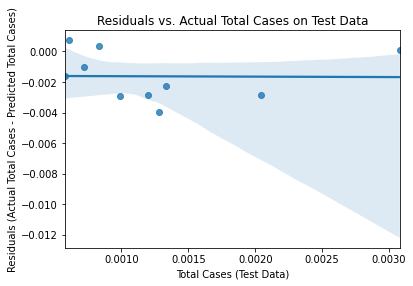

In [ ]:
residuals = y_test - y_test_predicted
ax = sns.regplot(y_test, residuals)
ax.set_xlabel('Total Cases (Test Data)')
ax.set_ylabel('Residuals (Actual Total Cases - Predicted Total Cases)')
ax.set_title("Residuals vs. Actual Total Cases on Test Data");

Y vs. Y_hat Plot (Training Data)

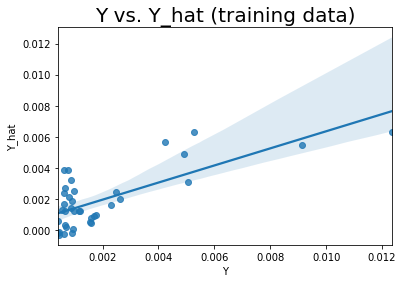

In [ ]:
sns.regplot(y_train,y_train_predicted)
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.title("Y vs. Y_hat (training data)", fontsize=20);

Y vs. Y_hat Plot (Test Data)

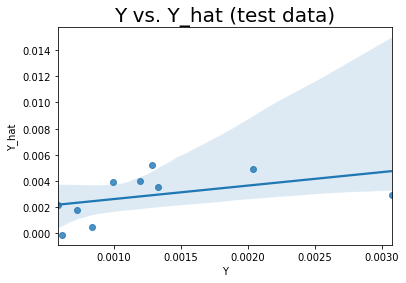

In [ ]:
sns.regplot(y_test,y_test_predicted)
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.title("Y vs. Y_hat (test data)", fontsize=20);

In [ ]:
highest_cases.head()

,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds,cases_prop,hosp_prop,icu_prop,state_cat
0,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0,0.012369,0.000008,0.000202,29
1,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0,0.009140,0.000007,0.000205,27
2,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0,0.005270,0.000008,0.000192,18
3,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0,0.002471,0.000013,0.000247,35
4,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0,0.003080,0.000013,0.000242,19


In [ ]:
highest_cases.head()

,total_cases,PopulationEstimate2018,DiabetesPercentage,HeartDiseaseMortality,StrokeMortality,dem_to_rep_ratio,Smokers_Percentage,RespMortalityRate2014,m_le14,f_le14,m_15_24,f_15_24,m_25_34,f_25_34,m_35_54,f_35_54,m_55_74,f_55_74,m_ge75,f_ge75,#Hospitals,#ICU_beds,cases_prop,hosp_prop,icu_prop,state_cat
0,241712,19542209.0,9.232258,180.220968,29.832258,1.201153,15.375752,55.395000,1804484.0,1726749.0,1411550.0,1365663.0,1309962.0,1349375.0,2674410.0,2814298.0,1703077.0,1961193.0,473664.0,783677.0,165.0,3952.0,0.012369,0.000008,0.000202,29
1,81420,8908520.0,8.423810,170.900000,32.423810,1.404909,14.068380,43.383810,865206.0,827899.0,588774.0,550563.0,553141.0,556660.0,1279849.0,1337644.0,776466.0,881133.0,216164.0,358395.0,64.0,1822.0,0.009140,0.000007,0.000205,27
2,36372,6902149.0,7.735714,140.935714,29.585714,2.159992,13.270095,45.264286,591571.0,566816.0,471136.0,467288.0,416593.0,428548.0,926014.0,973570.0,593807.0,666022.0,167507.0,278757.0,58.0,1326.0,0.005270,0.000008,0.000192,18
3,31652,12807060.0,9.605970,180.758209,36.105970,0.630734,17.939587,52.968806,1162802.0,1111522.0,904351.0,874861.0,757250.0,753869.0,1756693.0,1799380.0,1239050.0,1362832.0,370217.0,609552.0,162.0,3169.0,0.002471,0.000013,0.000247,35
4,30791,9995915.0,9.884337,194.303614,38.043373,0.665749,17.566229,61.081205,976290.0,932996.0,718046.0,690625.0,580833.0,583316.0,1377124.0,1410883.0,948673.0,1028033.0,247148.0,389673.0,130.0,2423.0,0.003080,0.000013,0.000242,19


In [ ]:
#OLS model-total cases

scaler = MinMaxScaler()

to_scale = highest_cases.columns #specify columns to rescale. don't include total_cases

highest_cases_temp = highest_cases.copy()


scaler.fit(highest_cases_temp[to_scale]) #Transform indexes to min max scaling
highest_cases_temp[to_scale]=scaler.transform(highest_cases_temp[to_scale]) #overwrite df values with rescaled values
X = highest_cases_temp[['PopulationEstimate2018','DiabetesPercentage','HeartDiseaseMortality','StrokeMortality','dem_to_rep_ratio','RespMortalityRate2014','icu_prop','state_cat']]

y= highest_cases_temp['total_cases'] #has trouble looking at 'state'
#y= highest_cases_adj_cases['cases_prop']

#X = highest_cases_temp.drop(columns=['cases_prop', 'total_cases'])


# Fit and summarize OLS model
mod = sm.OLS(y, X).fit()

print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:            total_cases   R-squared (uncentered):                   0.505
Model:                            OLS   Adj. R-squared (uncentered):              0.406
Method:                 Least Squares   F-statistic:                              5.108
Date:                Wed, 13 May 2020   Prob (F-statistic):                    0.000203
Time:                        23:43:22   Log-Likelihood:                          36.352
No. Observations:                  48   AIC:                                     -56.70
Df Residuals:                      40   BIC:                                     -41.73
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
#OLS model-proportional cases

scaler = MinMaxScaler()

to_scale = highest_cases.columns #specify columns to rescale. don't include total_cases

highest_cases_temp = highest_cases.copy()


scaler.fit(highest_cases_temp[to_scale]) #Transform indexes to min max scaling
highest_cases_temp[to_scale]=scaler.transform(highest_cases_temp[to_scale]) #overwrite df values with rescaled values
X = highest_cases_temp[['PopulationEstimate2018','DiabetesPercentage','HeartDiseaseMortality','StrokeMortality','dem_to_rep_ratio','RespMortalityRate2014','icu_prop','state_cat']]

y= highest_cases_temp['cases_prop'] #has trouble looking at 'state'
#y= highest_cases_adj_cases['cases_prop']

#X = highest_cases_temp.drop(columns=['cases_prop', 'total_cases'])


# Fit and summarize OLS model
mod = sm.OLS(y, X).fit()

print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:             cases_prop   R-squared (uncentered):                   0.630
Model:                            OLS   Adj. R-squared (uncentered):              0.556
Method:                 Least Squares   F-statistic:                              8.524
Date:                Wed, 13 May 2020   Prob (F-statistic):                    1.10e-06
Time:                        23:43:22   Log-Likelihood:                          28.077
No. Observations:                  48   AIC:                                     -40.15
Df Residuals:                      40   BIC:                                     -25.19
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
#Identifying Features with VIF 5 or lower
#source: https://www.listendata.com/2018/01/linear-regression-in-python.html

[variance_inflation_factor(X.values, j) for j in range(X.shape[1])]

X = highest_cases_temp[['PopulationEstimate2018','DiabetesPercentage','HeartDiseaseMortality','StrokeMortality','dem_to_rep_ratio','RespMortalityRate2014','icu_prop','state_cat']]


def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
     #   print("Iteration no.")
     #   print(i)
     #   print(vif)
        a = np.argmax(vif)
     #   print("Max VIF is for variable no.:")
     #   print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
X_out = calculate_vif(X)

In [ ]:
X_cols = X.columns
X_out_cols = X_out.columns
high_colinearity_X = X_cols.difference(X_out_cols)
print('Columns with High Colinearity (VIF < 5): ', high_colinearity_X)

Columns with High Colinearity (VIF < 5):  Index(['DiabetesPercentage', 'HeartDiseaseMortality', 'RespMortalityRate2014'], dtype='object')


In [ ]:
#Identifying Features with VIF 10 or lower
[variance_inflation_factor(X.values, j) for j in range(X.shape[1])]


def calculate_vif(x):
    threshold = 10.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
       # print("Iteration no.")
       # print(i)
       # print(vif)
        a = np.argmax(vif)
       # print("Max VIF is for variable no.:")
       # print(a)
        if vif[a] <= threshold :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)
X_out = calculate_vif(X)

In [ ]:
X_cols = X.columns
X_out_cols = X_out.columns
high_colinearity_X = X_cols.difference(X_out_cols)
print('Columns with High Colinearity (VIF < 10): ', high_colinearity_X)

Columns with High Colinearity (VIF < 10):  Index(['DiabetesPercentage', 'HeartDiseaseMortality'], dtype='object')


In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler()

to_scale = highest_cases.columns #specify columns to rescale. don't include total_cases

highest_cases_temp = highest_cases.copy()


scaler.fit(highest_cases_temp[to_scale]) #Transform indexes to min max scaling
highest_cases_temp[to_scale]=scaler.transform(highest_cases_temp[to_scale]) #overwrite df values with rescaled values


y= highest_cases_temp['cases_prop']

X = highest_cases[['DiabetesPercentage', 'HeartDiseaseMortality']]


# Fit and summarize OLS model
mod = sm.OLS(y, X).fit()

print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:             cases_prop   R-squared (uncentered):                   0.308
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              10.26
Date:                Wed, 13 May 2020   Prob (F-statistic):                    0.000207
Time:                        23:43:22   Log-Likelihood:                          13.047
No. Observations:                  48   AIC:                                     -22.09
Df Residuals:                      46   BIC:                                     -18.35
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
# Define PLS object
pls = PLSRegression(n_components=5)
# Fit

X = highest_cases[['PopulationEstimate2018','DiabetesPercentage','HeartDiseaseMortality','StrokeMortality','dem_to_rep_ratio','Smokers_Percentage','RespMortalityRate2014','m_le14','f_le14','m_15_24','f_15_24','m_25_34','f_25_34','m_35_54','f_35_54','m_55_74','f_55_74','m_ge75','f_ge75','#Hospitals','#ICU_beds','cases_prop','hosp_prop','icu_prop','state_cat']]
y= highest_cases_temp['cases_prop'] #has trouble looking at 'state'

mod = pls.fit(X, y)
# Cross-validation
y_cv = cross_val_predict(pls, X, y, cv=10)
# Calculate scores
score = r2_score(y, y_cv)

#print('Cross-validation: ', y_cv)
#mod.summary()
print('R^2 Score: ', score)


R^2 Score:  0.9479447929249497
